In [97]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import os

G = nx.karate_club_graph()
type(G)

networkx.classes.graph.Graph

In [139]:
username = 'marcusrashford'
month = 'feb'
file_name = os.path.join('data', 'kw_ana', username + '_adjmat_' + month + '.csv')
df = pd.read_csv(file_name, delimiter=';', index_col=0)

ntwrk = nx.Graph()  # create graph object
ntwrk.add_nodes_from(top100_list)  # add nodes from index of adjacency matrix

# add weighted edges iteratively - i and j are indices (row and column essentially)
for i in range(len(top100_list)):
    for j in range(i, len(top100_list)):  # recall matrix is upper triangular
        if df.iloc[i,j] != 0:
            ntwrk.add_edge(top100_list[i], top100_list[j], weight=df.iloc[i,j] )


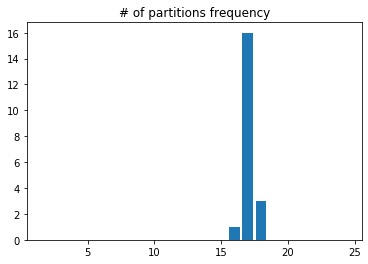

Found 17 communities for @marcusrashford in month 'feb'.


In [140]:
N = 20  # number of iterations to detect communities
iter_tracking = {k: 0 for k in range(2, 25)}
for i in range(N):
    # compute the best partition
    partition = community_louvain.best_partition(ntwrk)
    num_partitions = max(partition.values()) + 1
    iter_tracking[num_partitions] += 1

plt.bar(iter_tracking.keys(), iter_tracking.values())
plt.title('# of partitions frequency')
plt.show()

num_communities = str(max(iter_tracking, key=iter_tracking.get))  # most commonly found number of communities
print('Found ' + num_communities + ' communities for @' + username + ' in month \'' + month + '\'.')


In [121]:

df.columns

Index(['help', 'covid19', 'canada', 'support', 'country', 'canadians',
       'across', 'work', 'people', 'together', 'safe', 'spoke', 'working',
       'home', 'business', 'details', 'workers', 'call', 'health', 'live',
       'watch', 'family', 'update', 'businesses', 'taking', 'emergency',
       'world', 'thank', 'stay', 'response', 'everyone', 'thanks', 'making',
       'food', 'benefit', 'canadian', 'continue', 'giving', 'friends', 'care',
       'protect', 'click', 'tune', 'talked', 'focused', 'pandemic', 'spread',
       'morning', 'countries', 'year', 'communities', 'situation', 'fight',
       'families', 'steps', 'measures', 'thoughts', 'announcing', 'difficult',
       'helping', 'meeting', 'economy', 'impacts', 'earlier', 'talk', 'jobs',
       'important', 'week', 'phone', 'international', 'economic', 'strong',
       'able', 'virus', 'announced', 'loved', 'times', 'president', 'keeping',
       'prime_minister\n', 'apply', 'good', 'ones', 'leaders', 'government',
       

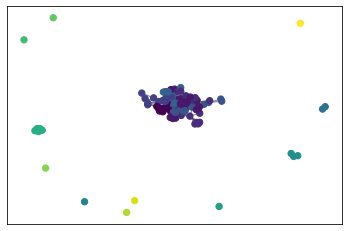

In [141]:
# draw the graph
pos = nx.spring_layout(ntwrk)
# colour the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values())+1)
nx.draw_networkx_nodes(ntwrk, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(ntwrk, pos, alpha=0.5)
plt.show()

In [57]:
top100_list

Index(['help', 'covid19', 'canada', 'support', 'country', 'canadians',
       'across', 'work', 'people', 'together', 'safe', 'spoke', 'working',
       'home', 'business', 'details', 'workers', 'call', 'health', 'live',
       'watch', 'family', 'update', 'businesses', 'taking', 'emergency',
       'world', 'thank', 'stay', 'response', 'everyone', 'thanks', 'making',
       'food', 'benefit', 'canadian', 'continue', 'giving', 'friends', 'care',
       'protect', 'click', 'tune', 'talked', 'focused', 'pandemic', 'spread',
       'morning', 'countries', 'year', 'communities', 'situation', 'fight',
       'families', 'steps', 'measures', 'thoughts', 'announcing', 'difficult',
       'helping', 'meeting', 'economy', 'impacts', 'earlier', 'talk', 'jobs',
       'important', 'week', 'phone', 'international', 'economic', 'strong',
       'able', 'virus', 'announced', 'loved', 'times', 'president', 'keeping',
       'prime_minister\n', 'apply', 'good', 'ones', 'leaders', 'government',
       